# Selection of krypton events in terms of S1 and S2

## Authors: JMH, JAH, GML, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

### Description:

- <RUN_PARAMS>


In [1]:
import time
print("Last updated on ", time.asctime())

Last updated on  Mon Oct 21 12:53:32 2019


In [2]:
run_number  = 7517
file_range  = 0, 1 
num_files = 1
analysis_tag = 'ScriptTest'
output = False

if num_files > 7729:
    num_xy_bins = 100
else:
    num_xy_bins = 50

num_xy_bins = 10
    
t0 = time.time()
last_time = t0

input_path  = f"$IC_DATA/kdst"
output_path = f"$IC_DATA/"+analysis_tag+"/dst"
trigger     = 'trigger1'

bootstrap_correction_filename   = '/Users/jmhaefner/Development/KryptonCalibration/InteractiveNBs/ICAROS_NBS/kr_emap_xy_100_100_r_6573_time.h5'
write_filtered_dst = True

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [4]:
import os
import time
import datetime 
import numpy as np
import pandas as pd
import tables            as tb
import random
import glob
import seaborn as sns
sns.set()

In [5]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units


In [6]:
from krcal.core.io_functions       import filenames_from_paths
from krcal.core.io_functions       import write_monitor_vars
from krcal.core.io_functions       import kdst_write
from krcal.core.histo_functions    import h1, h1d, h2d, plot_histo

In [7]:
from krcal.core.kr_types           import PlotLabels
from krcal.core.ranges_and_bins_functions      import kr_ranges_and_bins
from krcal.core.analysis_functions import kr_event
from krcal.core.analysis_functions import selection_info
from krcal.core.analysis_functions import selection_in_band
from krcal.core.analysis_functions import plot_selection_in_band
from krcal.core.s1s2_functions     import s1d_from_dst
from krcal.core.s1s2_functions     import s2d_from_dst
from krcal.core.s1s2_functions     import plot_s1histos
from krcal.core.s1s2_functions     import plot_s2histos

In [8]:
from krcal.core.plt_functions      import plot_xy_density
from krcal.core.plt_functions      import plot_s1_vs_z
from krcal.core.plt_functions      import plot_s2_vs_z
from krcal.core.plt_functions      import plot_s2_vs_s1
from krcal.core.plt_functions      import plot_q_vs_s2
from krcal.core.plt_functions      import plot_energy_distributions
from krcal.core.plt_functions      import plot_energy_vs_t


In [9]:
import krcal.dev.corrections       as corrections 
import krcal.utils.hst_extend_functions as hst

In [10]:
from krcal.core.core_functions          import time_delta_from_time

### Create vals file

### Input/output 

In [11]:
input_dst_filenames = ['/Users/jmhaefner/Development/KryptonCalibration/InteractiveNBs/ICAROS_NBS/kdst_7517_LB_0-100_TestMapScript.h5']
output_dst_filename = 'dst_test.h5'
print(f'input dsts:\n first = {input_dst_filenames[0]}\n last = {input_dst_filenames[-1]}')
print(f"output dst = {output_dst_filename}")

print('time before dst load =', round(time.time() - last_time))
last_time = time.time()

input dsts:
 first = /Users/jmhaefner/Development/KryptonCalibration/InteractiveNBs/ICAROS_NBS/kdst_7517_LB_0-100_TestMapScript.h5
 last = /Users/jmhaefner/Development/KryptonCalibration/InteractiveNBs/ICAROS_NBS/kdst_7517_LB_0-100_TestMapScript.h5
output dst = dst_test.h5
time before dst load = 7


In [12]:
dst_full           = load_dsts(input_dst_filenames, "DST", "Events")
print('time to load dst =', round(time.time() - last_time))
last_time = time.time()

time to load dst = 1


In [13]:
dst_full.describe()

,index,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
count,63176.000000,63176.000000,6.317600e+04,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,...,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000,63176.000000
mean,315.596097,31147.769485,1.568380e+09,0.146274,0.035362,1.292548,1.070723,204.077102,2.320374,11.998300,...,20.077656,316.744667,316.744667,1.693167,2.458229,-3.306518,135.872372,-0.030761,12.323124,12.473886
std,182.746952,18044.517536,8.557335e+02,0.432976,0.189014,0.628276,0.265643,71.753625,7.172875,52.691614,...,8.751332,183.257529,183.257529,0.540531,102.038226,101.485855,47.608413,1.796544,6.860987,7.349658
min,0.000000,1.000000,1.568379e+09,0.000000,0.000000,1.000000,1.000000,100.000000,0.544909,2.570679,...,1.000000,-708.671509,-708.671509,0.160922,-218.701027,-207.872033,0.380330,-3.141527,0.000000,0.000000
25%,157.000000,15507.750000,1.568380e+09,0.000000,0.000000,1.000000,1.000000,150.000000,1.531048,7.425456,...,18.000000,167.333447,167.333447,1.318022,-79.988970,-86.909996,102.870230,-1.573176,8.937202,8.923615
50%,315.000000,31101.500000,1.568380e+09,0.000000,0.000000,1.000000,1.000000,200.000000,2.004081,9.991791,...,20.000000,314.604462,314.604462,1.765529,3.078057,-3.617298,144.417824,-0.068499,9.855792,9.866614
75%,473.000000,46733.250000,1.568381e+09,0.000000,0.000000,1.000000,1.000000,250.000000,2.566951,13.063870,...,22.000000,458.251442,458.251442,2.115386,84.688755,80.373771,175.932920,1.506304,12.006622,12.070091
max,672.000000,62456.000000,1.568382e+09,4.000000,3.000000,5.000000,4.000000,725.000000,535.216248,4916.229004,...,1040.000000,1363.557739,1363.557739,6.452371,235.000000,203.331010,257.390754,3.141383,141.950571,160.615811


In [14]:
unique_events = ~dst_full.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 63176 
Total number of events: 54091


In [15]:
dst_full.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [16]:
ntot = len(dst_full)
print(f"length of dst = {ntot}")

length of dst = 63176


### S1/S2

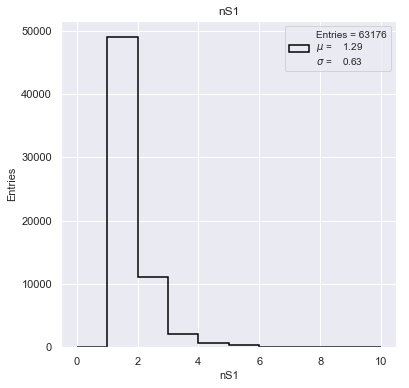

In [17]:
n, b, _, _ = h1d(dst_full.nS1.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS1', y='Entries', title='nS1'))

In [18]:
fnS1 = n[n.argmax()]/np.sum(n)
print(f'fraction of S1s = {fnS1}')

fraction of S1s = 0.776149170571103


#### Fraction of events with 1 S1 is 0.5, due to grass and high energy events. For Krypton select events with 1 S1

### Select events with 1 S1

In [19]:
dst_full.event.nunique()

54091

In [20]:
dst1s1 = dst_full[dst_full.nS1==1]

In [21]:
dst1s1.event.nunique()

48184

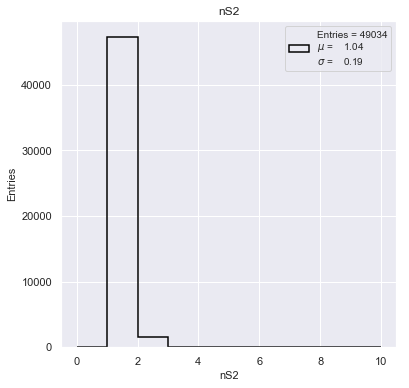

In [22]:
n, b, _, _ = h1d(dst1s1.nS2.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS2', y='Entries', title='nS2'))

#### For Krypton select events with only 1 S2

In [23]:
fnS2 = n[n.argmax()]/np.sum(n)
print(f'fraction of S2s = {fnS2}')

fraction of S2s = 0.9656564832565159


### Select events with 1 S2

In [24]:
dst    = dst1s1[dst1s1.nS2==1]

In [25]:
dst.event.nunique()

47350

In [26]:
n_full   = len(dst)
eff = n_full   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {n_full}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 47350: selection eff = 0.749493478536153 


In [27]:
dst.describe()

,index,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
count,47350.000000,47350.000000,4.735000e+04,47350.0,47350.0,47350.0,47350.0,47350.000000,47350.000000,47350.000000,...,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000,47350.000000
mean,314.961668,31184.903168,1.568380e+09,0.0,0.0,1.0,1.0,210.612988,2.127628,10.934147,...,19.941711,300.753812,300.753812,1.680854,2.588048,-3.635978,135.450549,-0.037758,12.291729,12.442991
std,182.946844,18030.314583,8.550811e+02,0.0,0.0,0.0,0.0,69.206488,3.280043,18.506540,...,3.040384,163.897596,163.897596,0.526637,101.966858,100.925726,47.496552,1.796451,6.654970,7.188586
min,0.000000,1.000000,1.568379e+09,0.0,0.0,1.0,1.0,100.000000,0.559223,2.668969,...,5.000000,10.895876,10.895876,0.334973,-206.671263,-207.667382,0.380330,-3.141527,3.844869,4.859207
25%,156.000000,15530.250000,1.568380e+09,0.0,0.0,1.0,1.0,150.000000,1.545284,7.686244,...,18.000000,159.932446,159.932446,1.304262,-79.841125,-86.770520,102.632836,-1.579212,8.926495,8.919784
50%,315.000000,31211.500000,1.568380e+09,0.0,0.0,1.0,1.0,200.000000,1.992064,10.225025,...,20.000000,301.511826,301.511826,1.749187,3.492638,-3.920115,143.912494,-0.075069,9.840897,9.848041
75%,473.000000,46796.500000,1.568381e+09,0.0,0.0,1.0,1.0,250.000000,2.514058,13.168130,...,22.000000,441.667412,441.667412,2.103808,84.723523,79.001531,175.391743,1.493508,11.955762,12.015537
max,672.000000,62456.000000,1.568382e+09,0.0,0.0,1.0,1.0,725.000000,446.829376,2657.425049,...,169.000000,799.676086,799.676086,6.452371,205.909415,203.331010,215.229849,3.141243,81.981089,160.615811


### Cut on R < 200

In [28]:
dst     = dst[dst.R < 200]

In [29]:
dst.event.nunique()

46274

### S1 and S2 distributions

In [30]:
s1d = s1d_from_dst(dst)

warning, empty slice of x = [339775. 566550. 301300. ... 244075. 305800. 613600.] in range = (0, 600)
returning mean and std of x = [339775. 566550. 301300. ... 244075. 305800. 613600.]


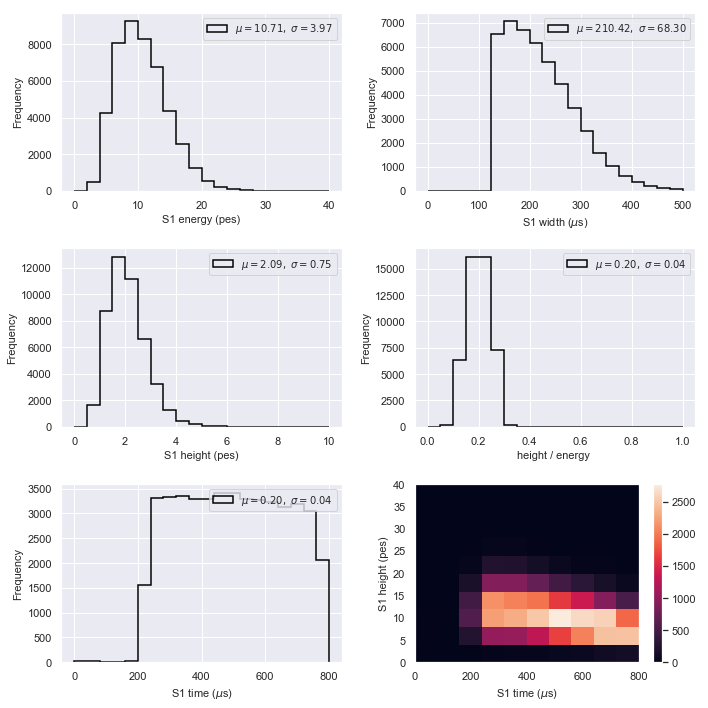

In [31]:
plot_s1histos(dst,  s1d, bins=20, figsize=(10,10))

In [32]:
dst.describe()

,index,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
count,46274.000000,46274.000000,4.627400e+04,46274.0,46274.0,46274.0,46274.0,46274.000000,46274.000000,46274.000000,...,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000,46274.000000
mean,314.934131,31169.111791,1.568380e+09,0.0,0.0,1.0,1.0,210.842482,2.119556,10.895357,...,19.980486,303.875887,303.875887,1.691003,1.717363,-2.206715,133.888243,-0.022461,12.349676,12.511116
std,183.138749,18031.155210,8.551228e+02,0.0,0.0,0.0,0.0,69.231370,2.766213,15.956429,...,3.001924,163.459338,163.459338,0.524330,100.369805,100.226748,46.913416,1.800214,6.696068,7.242568
min,0.000000,1.000000,1.568379e+09,0.0,0.0,1.0,1.0,100.000000,0.559223,2.668969,...,8.000000,10.895876,10.895876,0.334973,-199.748181,-199.630554,0.380330,-3.141527,4.738984,5.142960
25%,156.000000,15511.250000,1.568380e+09,0.0,0.0,1.0,1.0,150.000000,1.548710,7.712655,...,18.000000,164.698940,164.698940,1.320601,-79.591127,-85.070706,101.387069,-1.572043,8.946459,8.942907
50%,315.000000,31179.500000,1.568380e+09,0.0,0.0,1.0,1.0,200.000000,1.996030,10.253355,...,20.000000,305.859344,305.859344,1.761865,2.502367,-2.260601,142.314437,-0.047778,9.863305,9.872766
75%,473.000000,46785.750000,1.568381e+09,0.0,0.0,1.0,1.0,250.000000,2.518934,13.195016,...,22.000000,444.539551,444.539551,2.111308,82.523926,80.122496,173.425138,1.516872,12.073480,12.135922
max,672.000000,62456.000000,1.568382e+09,0.0,0.0,1.0,1.0,725.000000,446.829376,2657.425049,...,169.000000,799.676086,799.676086,6.452371,199.654963,199.048656,199.984797,3.141243,81.981089,160.615811


### Fiducial selection in S1

#### 3 < S1e < 25 pes, which cuts off very low and high energy events

In [33]:
s1e_range =(3, 25)

In [34]:
dst_s1e    = dst[in_range(dst.S1e, *s1e_range)] 

In [35]:
dst_s1e.event.nunique()

46115

warning, empty slice of x = [339775. 566550. 301300. ... 244075. 305800. 613600.] in range = (0, 600)
returning mean and std of x = [339775. 566550. 301300. ... 244075. 305800. 613600.]


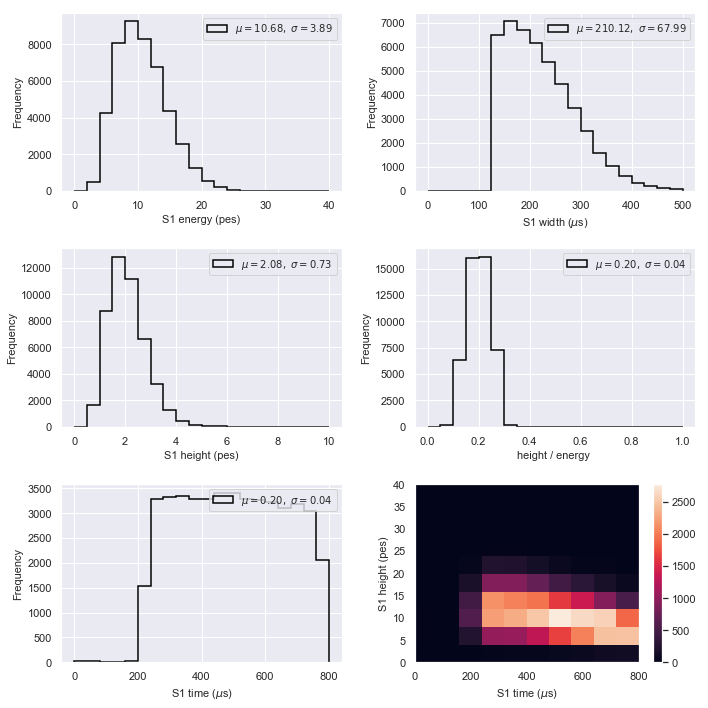

In [36]:
s1d = s1d_from_dst(dst_s1e, range_s1e = s1e_range)
plot_s1histos(dst_s1e,  s1d, bins=20, figsize=(10,10))

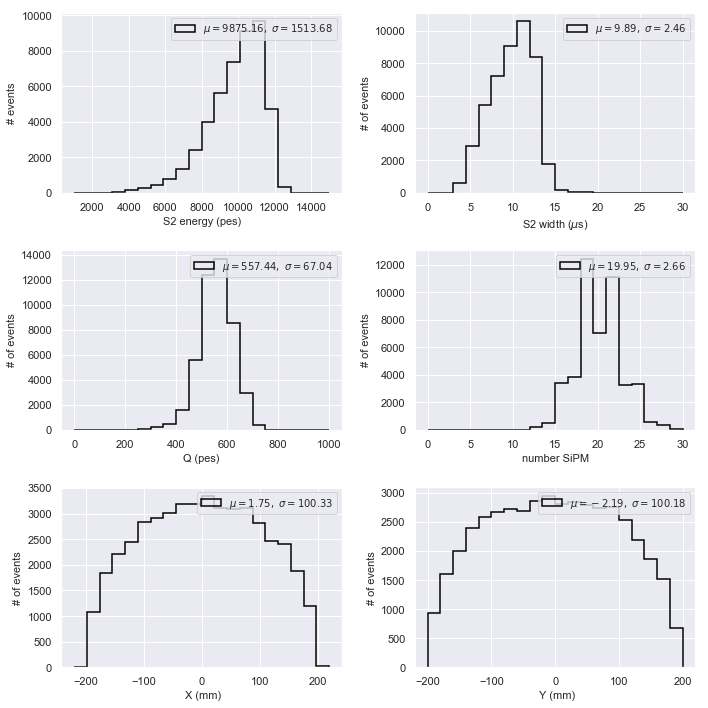

In [37]:
dst = dst_s1e
s2d = s2d_from_dst(dst)
plot_s2histos(dst, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

### Fiducial selection in S2

In [38]:
s2e_range =(8000, 14000)
s2q_range =(200, 800)

In [39]:
dst_s2e    = dst[in_range(dst.S2e, *s2e_range)]
print(dst_s2e.event.nunique())
dst_s2q    = dst_s2e[in_range(dst_s2e.S2q, *s2q_range)]
print(dst_s2q.event.nunique())
dst = dst_s2q

40732
40729


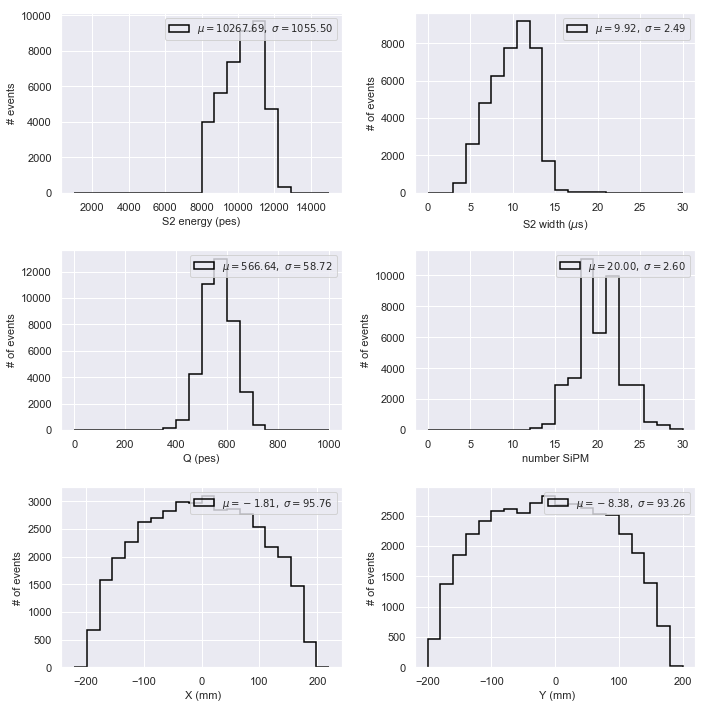

In [40]:
s2d = s2d_from_dst(dst_s2e)
plot_s2histos(dst, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

### Time differences in seconds

In [41]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Define ranges and bins

In [42]:
krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = (-200,  200),
                                                        yrange    = (-200,  200),
                                                        zrange    = (10,  550),
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = num_xy_bins,
                                                        ynbins    = num_xy_bins,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 25,
                                                        s2qnbins  = 25,
                                                        tpsamples = 1) # tsamples in seconds

In [43]:
num_xy_bins

10

### Time
- Extension in hours of data sample considered

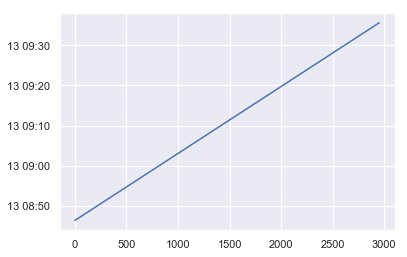

In [44]:
plt.plot(krTimes.timeStamps)

In [45]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

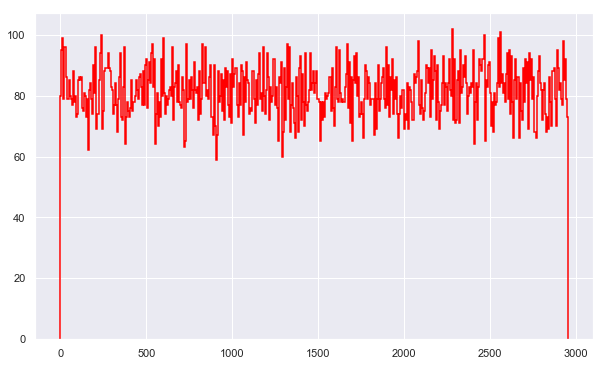

In [46]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Control distributions

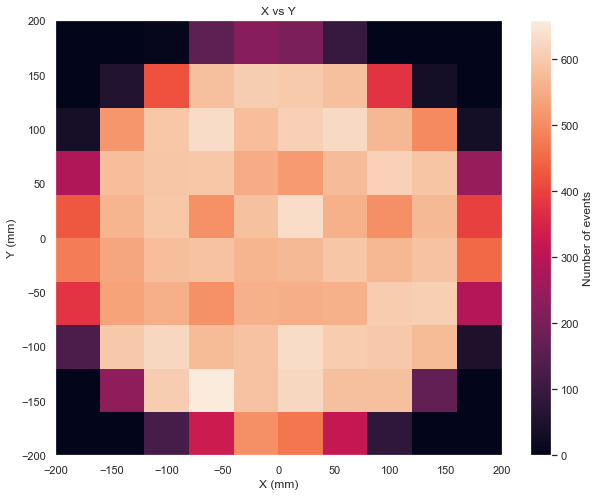

In [47]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

In [48]:
print(nevt)

[[  0.   0. 132. 380. 479. 429. 284.  41.   0.   0.]
 [  0. 238. 598. 536. 541. 564. 580. 515.  61.   0.]
 [121. 605. 624. 557. 581. 597. 593. 596. 421.  10.]
 [330. 659. 575. 508. 587. 509. 596. 631. 583. 161.]
 [505. 587. 589. 560. 566. 585. 551. 581. 607. 224.]
 [470. 624. 631. 555. 574. 634. 524. 611. 601. 208.]
 [321. 582. 604. 560. 594. 561. 579. 628. 584.  96.]
 [ 80. 582. 598. 604. 571. 505. 615. 570. 378.   1.]
 [  0. 165. 575. 608. 587. 574. 590. 497.  34.   0.]
 [  0.   0.  50. 294. 452. 397. 248.  36.   0.   0.]]


In [49]:
np.sum(nevt)

40729.0

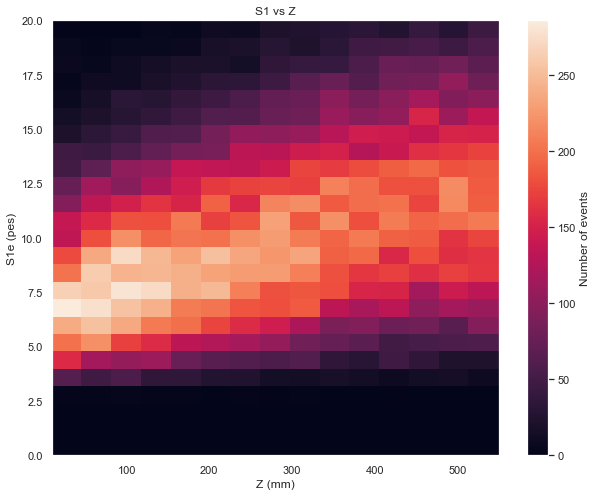

In [50]:
nevt = h2d(dst.Z, dst.S1e, krNbins.Z, krNbins.S1e, krRanges.Z, (0,20), 
           pltLabels=PlotLabels(x='Z (mm)', y='S1e (pes)', title='S1 vs Z'),
           profile=False,
           figsize=(10,8))

#### S1 vs Z distribution:

- Concentrated at low Z: This is due to the fact that gas flow is higher near the anode, and thus there is more krypton near the anode than near the cathode. 
- Increases as a function of Z. The closer to the cathode the larger S1
- Spread is large: This is due to large variation of solid angle, depending on (X,Y)

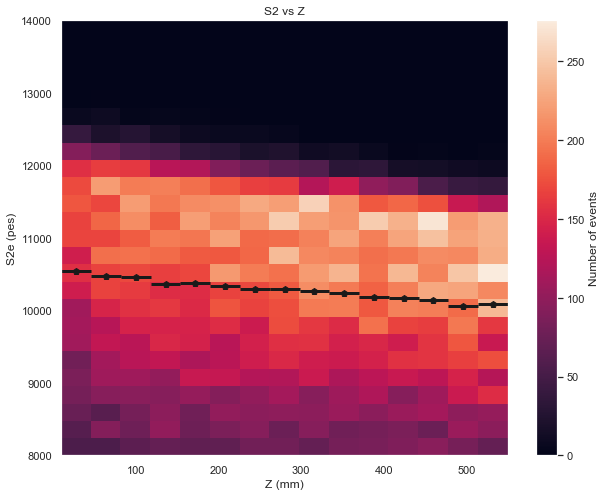

In [51]:
nevt = h2d(dst.Z, dst.S2e, krNbins.Z, krNbins.S1e, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z (mm)', y='S2e (pes)', title='S2 vs Z'),
           profile=True,
           figsize=(10,8))

#### S2 vs Z distribution:

- Concentrated at low Z: This is due to the fact that gas flow is higher near the anode, and thus there is more krypton near the anode than near the cathode. 
- Decreases as a function of Z, due to lifetime
- Spread is large: This is due to large variation of solid angle, depending on (X,Y)

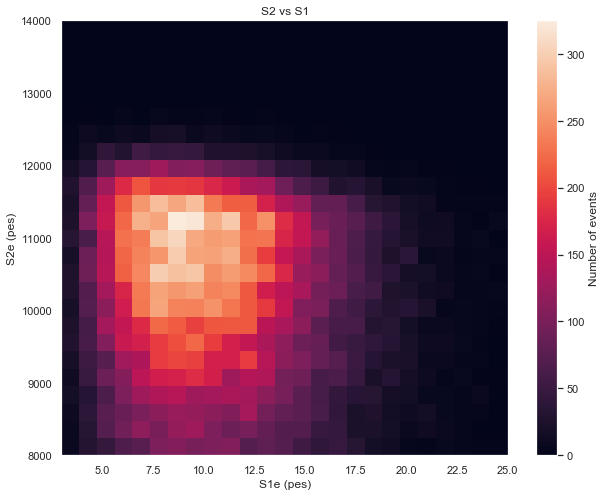

In [52]:
nevt = h2d(dst.S1e, dst.S2e, krNbins.S1e, krNbins.S2e, krRanges.S1e, krRanges.S2e, 
           pltLabels=PlotLabels(x='S1e (pes)', y='S2e (pes)', title='S2 vs S1'),
           profile=False,
           figsize=(10,8))

#### S2 vs S1 distribution:

- Small anti-correlation (more S2 less S1). 

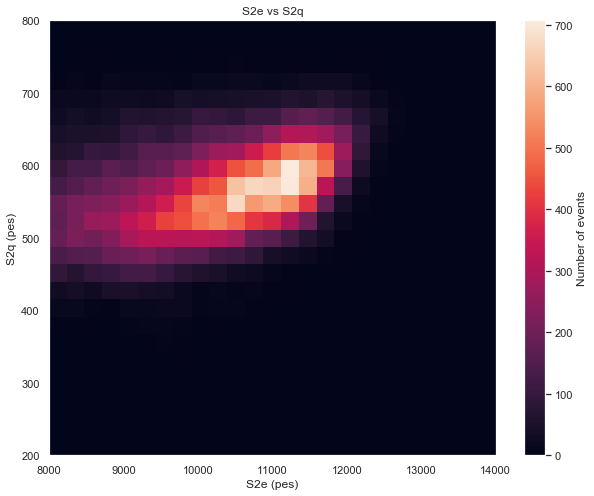

In [53]:
nevt = h2d(dst.S2e, dst.S2q, krNbins.S2e, krNbins.S2q, krRanges.S2e, krRanges.S2q, 
           pltLabels=PlotLabels(x='S2e (pes)', y='S2q (pes)', title='S2e vs S2q'),
           profile=False,
           figsize=(10,8))

#### S2 vs Q distribution:

- Clear correlation between S2 and Q 

### Select central region in R 

#### The effect is to reduce the dependence of geometrical corrections

In [54]:
dst_R     = dst[dst.R < 100]

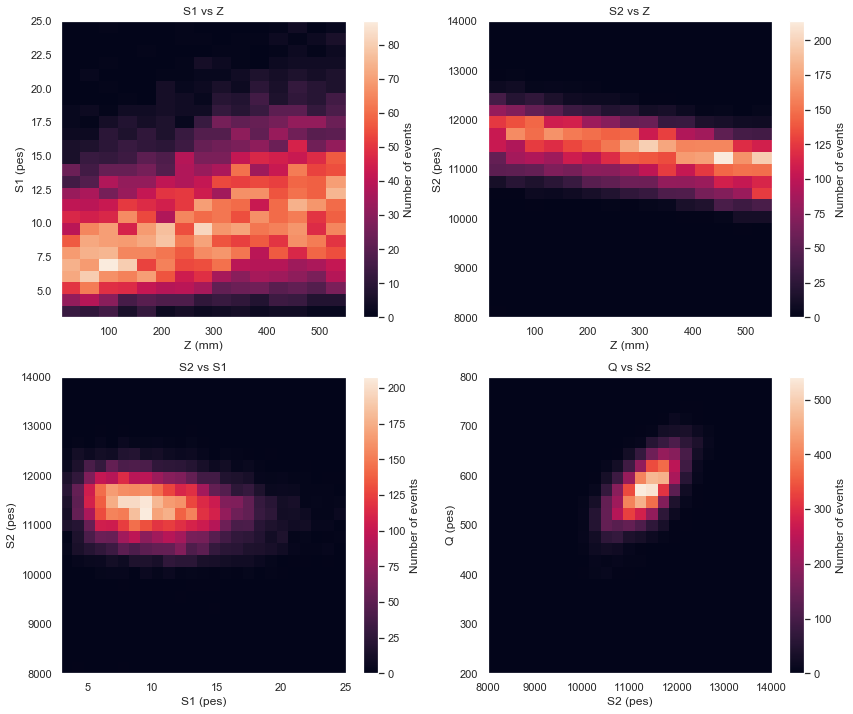

In [55]:
plot_energy_distributions(dst_R, krBins.Z, krBins.S1e, krBins.S2e, krBins.S2q, figsize=(14,12))

### Select central region in Z

- The effect is to reduce the dependence of lifetime

In [56]:
dst_core     = dst_R[dst_R.Z < 200]

### Energy in core

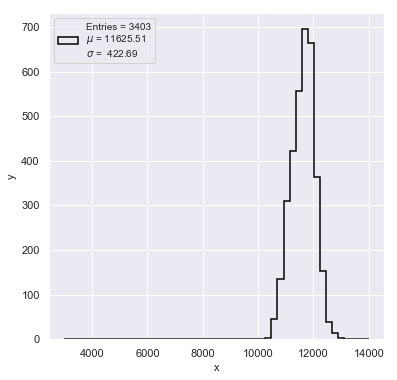

In [57]:
(_) = h1d(dst_core.S2e, bins = 50, range =(3000,14000), legendloc='upper left')

### Apply bootstrap corrections.

- One can correct S2e and S2q by geometrical corrections using an existing map (a bootstrap map). This has the effect to reduce the geometrical dependence on both distributions, permitting an additional filtering

In [58]:
kre = kr_event(dst)

In [59]:
# corrections.Calibration??

In [60]:
from krcal.core.io_functions       import read_maps
from krcal.core.correction_functions import e0_xy_correction
from krcal.core.map_functions   import amap_max

emaps = read_maps(filename=bootstrap_correction_filename)
norm = amap_max(emaps)
E = e0_xy_correction(dst.S2e.values,
                      dst.X.values,
                      dst.Y.values,
                      E0M = emaps.e0 / norm.e0, 
                      xr  = krRanges.X,
                      yr  = krRanges.Y,
                      nx  = 100, 
                      ny  = 100)
Q = e0_xy_correction(dst.S2q.values,
                      dst.X.values,
                      dst.Y.values,
                      E0M = emaps.e0 / norm.e0, 
                      xr  = krRanges.X,
                      yr  = krRanges.Y,
                      nx  = 100, 
                      ny  = 100)

In [61]:
kge = kr_event(dst, DT, E, Q)

In [62]:
krRanges.S2e

(8000, 14000)

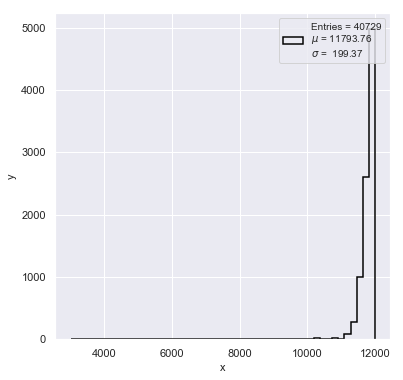

In [63]:
(_) = h1d(kge.E, bins = 50, range =(3000,12000))

#### Plot of E and Q corrected vs Z shows much less spread (XY corrections applied only remaining LT corrections)

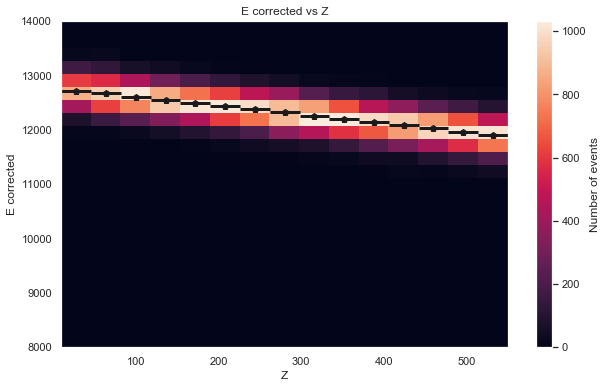

In [64]:
nevt = h2d(dst.Z, E, krNbins.Z, krNbins.S2e, krRanges.Z, krRanges.S2e, 
           pltLabels=PlotLabels(x='Z', y='E corrected', title='E corrected vs Z'),
           profile=True,
           figsize=(10,6))

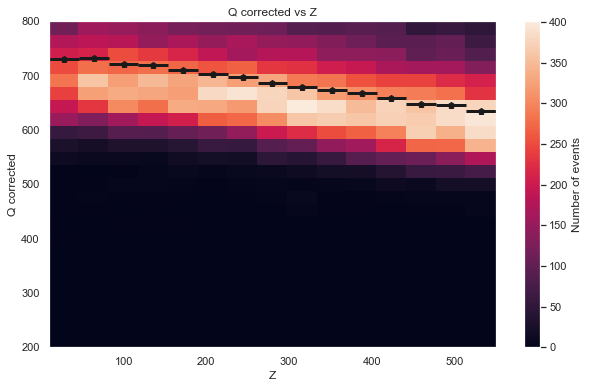

In [65]:
nevt = h2d(dst.Z, Q, krNbins.Z, krNbins.S2q, krRanges.Z, krRanges.S2q, 
           pltLabels=PlotLabels(x='Z', y='Q corrected', title='Q corrected vs Z'),
           profile=True,
           figsize=(10,6))

### Filter

In [66]:
range_krs2 = (10e+3,14e+3)

In [67]:
sel_krband, fpl, fph, hp, pp = selection_in_band(kre.Z, E,
                                                 range_z = krRanges.Z,
                                                 range_e = range_krs2,
                                                 nbins_z = 15,
                                                 nbins_e = 25,
                                                 nsigma  = 3.5)


/Users/jmhaefner/ICAROS/krcal/core/fit_functions.py:48: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
/Users/jmhaefner/ICAROS/krcal/core/fit_functions.py:48: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)


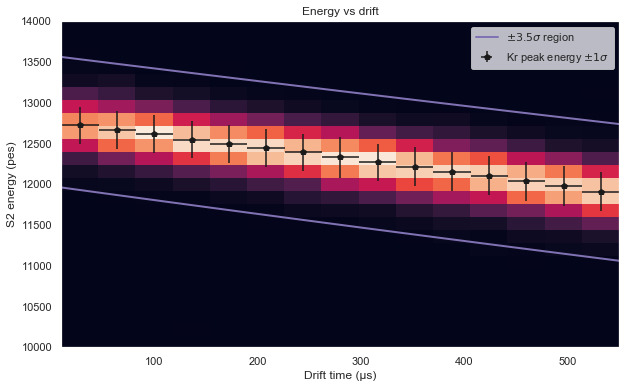

In [68]:
plot_selection_in_band(fpl, fph, hp, pp)

In [69]:
selection_info(sel_krband, 'Kr band')

Total number of selected candidates Kr band: 40551 (99.6 %)


'Total number of selected candidates Kr band: 40551 (99.6 %)'

In [70]:
kges = kr_event(dst, DT, E, Q, sel_mask=sel_krband)

### Energy before and after filter

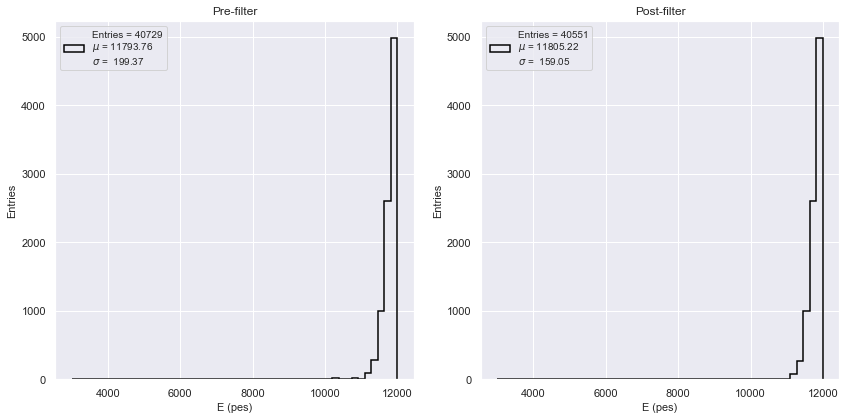

In [71]:
fig = plt.figure(figsize=(12,6))
ax      = fig.add_subplot(1, 2, 1)
(_)     = h1(kge.E,  bins = 50, range =(3000,12000))
plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')
ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(kges.E,  bins = 50, range =(3000,12000))
plot_histo(PlotLabels('E (pes)','Entries','Post-filter'), ax, legendloc='upper left')
plt.tight_layout()

### Select dst 

In [72]:
dsts = dst[sel_krband]

### X vs Y again

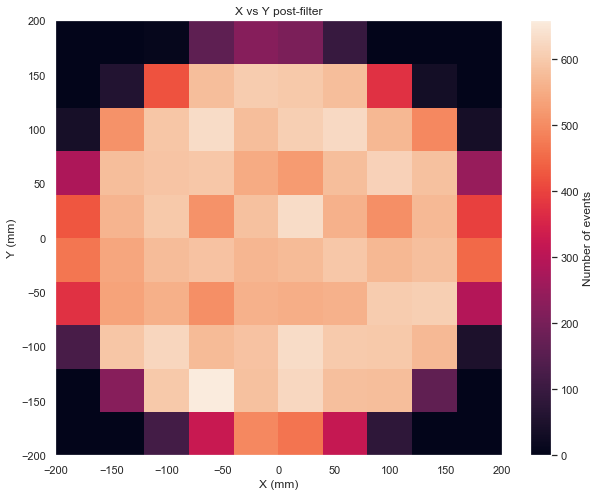

In [73]:
nevt = h2d(dsts.X, dsts.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y post-filter'),
           profile=False,
           figsize=(10,8))

In [74]:
np.sum(nevt)

40551.0

### Spatial distributions 

#### In R and Z

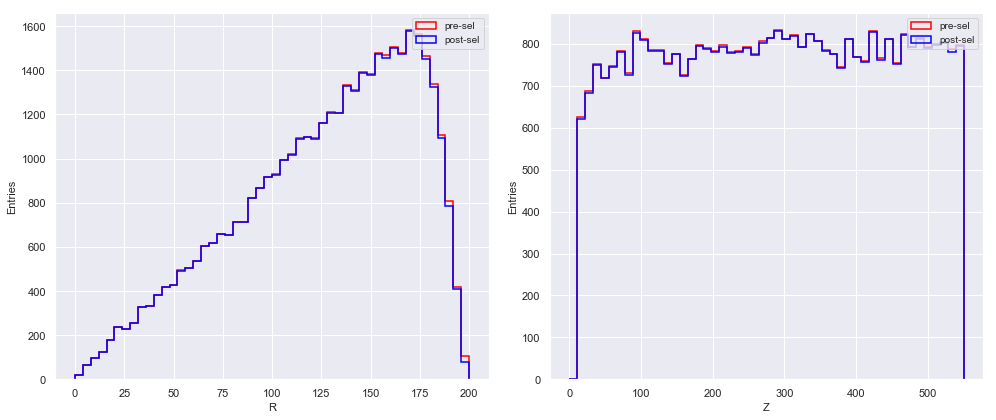

In [75]:
fig = plt.figure(figsize=(14,6))
ax      = fig.add_subplot(1, 2, 1)
(_)    = h1(kge.R, bins=50, range = (0,200), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('R','Entries',''), ax)
(_)   = h1(kges.R, bins=50, range = (0,200), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('R','Entries',''), ax)
ax      = fig.add_subplot(1, 2, 2)
(_)    = h1(kge.Z, bins=50, range = (0,550), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('Z','Entries',''), ax)
(_)    = h1(kges.Z, bins=50, range = (0,550), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('Z','Entries',''), ax)
plt.tight_layout()

#### In X Y

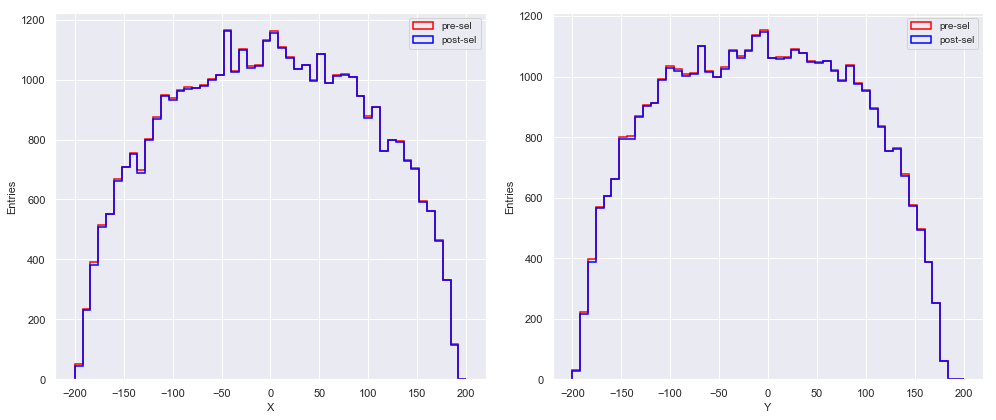

In [76]:
fig = plt.figure(figsize=(14,6))
ax      = fig.add_subplot(1, 2, 1)
(_)    = h1(kge.X, bins=50, range = (-200,200), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('X','Entries',''), ax)
(_)    = h1(kges.X, bins=50, range = (-200,200), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('X','Entries',''), ax)
ax      = fig.add_subplot(1, 2, 2)
(_)    = h1(kge.Y, bins=50, range = (-200,200), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('X','Entries',''), ax)
(_)    = h1(kges.Y, bins=50, range = (-200,200), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('Y','Entries',''), ax)
plt.tight_layout()

### Charge and SiPM distributions

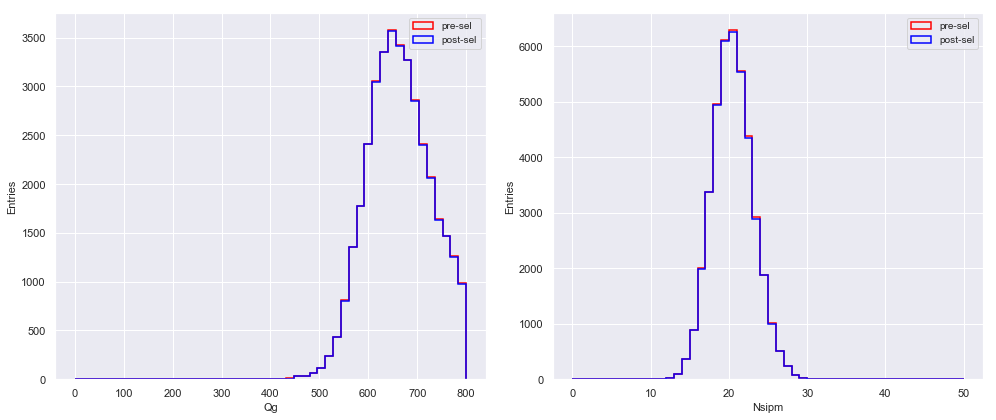

In [77]:
fig = plt.figure(figsize=(14,6))
ax      = fig.add_subplot(1, 2, 1)
(_)    = h1(kge.Q, bins=50, range = (0,800), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('Qg','Entries',''), ax)
(_)    = h1(kges.Q, bins=50, range = (0,800), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('Qg','Entries',''), ax)
ax      = fig.add_subplot(1, 2, 2)
(_)    = h1(dst.Nsipm, bins=50, range = (0,50), color='red', stats=False, lbl='pre-sel')
plot_histo(PlotLabels('Nsipm','Entries',''), ax)
(_)    = h1(dsts.Nsipm, bins=50, range = (0,50), color='blue',stats=False, lbl='post-sel')
plot_histo(PlotLabels('Nsipm','Entries',''), ax)
plt.tight_layout()

### Write DST (merged and fiducial)

In [78]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [79]:
print('Time after loading to before writing =', round(time.time() - last_time))
last_time = time.time()

Time after loading to before writing = 42


In [80]:
if output:
    import subprocess

    bash_mkdir = "mkdir " + os.environ['IC_DATA']+analysis_tag
    process = subprocess.Popen(bash_mkdir, stdout=subprocess.PIPE, shell=True).wait()
    bash_mkdir = "mkdir " + output_dst_filename[:output_dst_filename.rfind('/')+1]
    process = subprocess.Popen(bash_mkdir, stdout=subprocess.PIPE, shell=True).wait()

    output_dst = tb.open_file(output_dst_filename, 'w')

    from invisible_cities.io.dst_io import _store_pandas_as_tables
    import h5py

    _store_pandas_as_tables(h5out = output_dst, df = dsts, group_name = 'DST', table_name = 'Events')

    output_dst.close()

# Krypton Lifetime maps

### Author:  JMH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [81]:
from krcal.core.kr_types import KrFileName

input_tag = 'ScriptTest'

regularize = False

t_start = time.time()

lifetime_limits = (1000, 15000)
e0_limits = (7000, 14000)
e0_limits_rphi = (12000, 14000)

input_path  = f"$IC_DATA/"+input_tag+"/dst"
map_path    = f"$IC_DATA/"+analysis_tag+"/maps"

input_file_name = 'dst_test.h5'
input_file_names  = [ input_file_name ]
    
time_bins = 10
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_'+str(run_number)+'.h5'
map_file_name_ts  = f'kr_maps_rphi_5_8_ts_{time_bins}_'+str(run_number)+'.h5'
emap_file_name    = 'kr_emap_xy_'+str(num_xy_bins)+'_'+str(num_xy_bins)+'_r_'+str(run_number)+'_'+analysis_tag+'.h5'

In [82]:
import warnings
from krcal.core.io_functions       import write_maps
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import add_mapinfo
from krcal.core.xy_maps_functions   import draw_xy_maps
from krcal.core.selection_functions  import event_map_df
from krcal.core.selection_functions  import select_xy_sectors_df
from krcal.core.fitmap_functions     import fit_map_xy_df

### Input/output 

In [83]:
t0 = time.time()
dst = dsts
#dst           = load_dsts([input_file_name], "DST", "Events")
t1 = time.time()
print(f'Read in file time: t = {t1 -t0}')

Read in file time: t = 4.9114227294921875e-05


In [84]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {len(dst)}")

Total number of events: 40551


In [85]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [86]:
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [87]:
RMAX      = 200
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (10000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 18000)
lt_range = (1000, 9000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = num_xy_bins,
                                                        ynbins    = num_xy_bins,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 25,
                                                        s2qnbins  = 25,
                                                        tpsamples = 1) # tsamples in seconds

In [88]:
dstFid = dst[in_range(dst.R, 0, RMAX)]

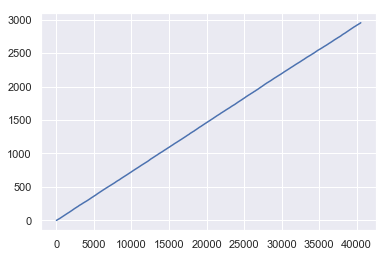

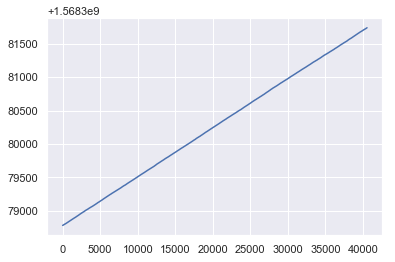

In [89]:
dst_time = dstFid.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)
dst = dst_time.assign(DT=DT)
plt.plot(DT)
plt.show()
plt.plot(T)
plt.show()

In [90]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

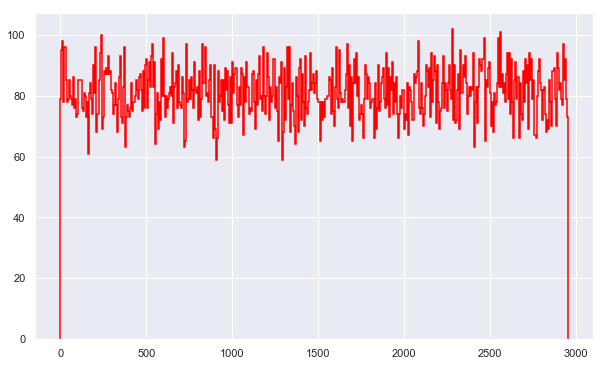

In [91]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

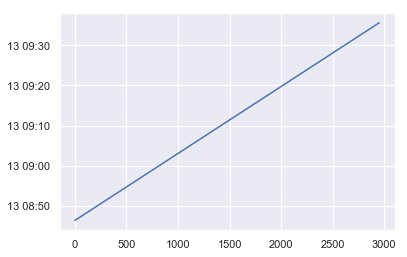

In [92]:
plt.plot(krTimes.timeStamps)

### Event distribution

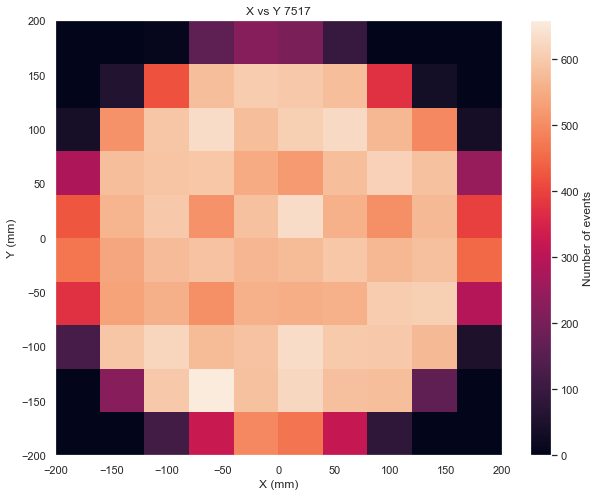

In [93]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y '+str(run_number)),
           profile=False,
           figsize=(10,8))

In [94]:
np.sum(nevt)

40551.0

## Divide chamber in sectors of XY

In [95]:
t0 = time.time()
print(len(dst))
print(len(DT))
# KRES = select_xy_sectors(dst, DT, dst.S2e.values, dst.S2q.values, krBins.X, krBins.Y)
KRES = select_xy_sectors_df(dst, krBins.X, krBins.Y) # [edit]
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

40551
40551
 KRES: t = 0.20414185523986816


In [96]:
neM = event_map_df(KRES)

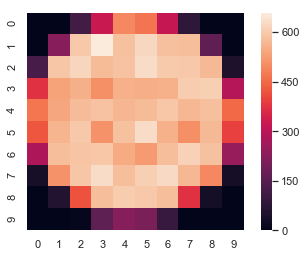

In [97]:
ax = sns.heatmap(neM, square=True)

In [98]:
np.sum(np.sum(neM))

40551

In [99]:
print(neM)

     0    1    2    3    4    5    6    7    8    9
0    0    0  116  325  496  466  320   80    0    0
1    0  226  598  658  586  623  582  580  163    0
2  124  593  620  574  588  630  601  597  573   49
3  373  536  557  506  559  553  560  603  608  293
4  468  540  578  587  566  574  594  569  582  450
5  426  563  597  509  584  632  560  505  572  396
6  282  579  591  595  550  523  579  614  586  247
7   41  509  593  630  579  609  627  569  495   36
8    0   61  419  580  604  598  580  375   34    0
9    0    0   10  160  223  208   96    1    0    0


## Fits in XY sectors

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```


### Single time bin

In [100]:
krNbins.S2e

25

In [101]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy_df(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 2)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 0.9519867897033691


In [102]:
times = fpmxy[0][0].ts

In [103]:
times

array([1476.75450003])

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [104]:
tsm = tsmap_from_fmap(fpmxy)

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### There is a single time series (ts = 0)

In [105]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [106]:
am.lt

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,35598.484225,9221.567980,12032.316188,10653.922041,13206.554517,9906.883282,NaN,NaN
1,NaN,13327.070996,7688.671925,7846.390070,7746.926519,8599.464980,7796.673215,7847.742978,16828.238296,NaN
2,8402.687294,10142.669670,8379.600371,8400.224062,7787.698028,9315.008191,7365.836060,8014.404883,9498.137163,10046.772550
3,10387.801575,9134.260966,9103.073539,10180.170391,7990.638086,8733.377090,8548.254434,10346.604870,9437.074274,13436.791321
4,13339.519497,7967.161837,7318.045122,7412.559238,8381.132997,8777.570950,7957.132514,7875.839004,7753.532598,13050.667542
5,9274.607266,7539.668804,7859.257271,7896.067767,8098.823876,7401.771083,7586.027442,7561.861199,6999.281733,9035.174215
6,11926.820538,9047.884595,7815.554793,7075.186060,7118.962098,7798.057329,7742.986666,8015.445255,6754.099074,18893.850243
7,18396.518913,9964.772508,7314.344078,6769.673774,7772.113350,7792.137238,7856.373257,7773.411212,13340.959412,25217.699859
8,NaN,-415910.681438,10888.208675,6163.830400,7380.227536,7870.675796,7412.219015,11702.940140,12335.096885,NaN
9,NaN,NaN,-22668.775883,15527.743570,12837.191318,11364.971113,12742.536024,NaN,NaN,NaN


In [107]:
amap_average(am) 

ASectorMap(chi2=1.1289577106869628, e0=10143.286281357558, lt=4539.992673090643, e0u=41.840487557925414, ltu=74514.5853032504, mapinfo=None)

#### Get rid of outlayers that distort mean and error

In [108]:
def asm_copy(amap):
    return ASectorMap(chi2  = amap.chi2.copy(),
                      e0    = amap.e0.copy(),
                      lt    = amap.lt.copy(),
                      e0u   = amap.e0u.copy(),
                      ltu   = amap.ltu.copy(),
                      mapinfo   = None)

def regularize_maps_chi2(amap_old, x2range):

    amap = asm_copy(amap_old)
    
    for i in range(len(amap.lt)):
        for j in range(len(amap.lt[i])):
            if amap.chi2[i][j] > x2range[1] or amap.chi2[i][j] < x2range[0]:
                amap.lt[i][j] = np.nan
                amap.ltu[i][j] = np.nan
                amap.e0[i][j] = np.nan
                amap.e0u[i][j] = np.nan

    return amap

In [109]:
if regularize:
    rmap = regularize_maps_chi2(am, x2range = (0, 2))
    amap_average(rmap)
    asm = relative_errors(rmap)
else:
    asm = relative_errors(am)

In [110]:
amv = amap_average(asm)

#### Draw the maps using default colormap

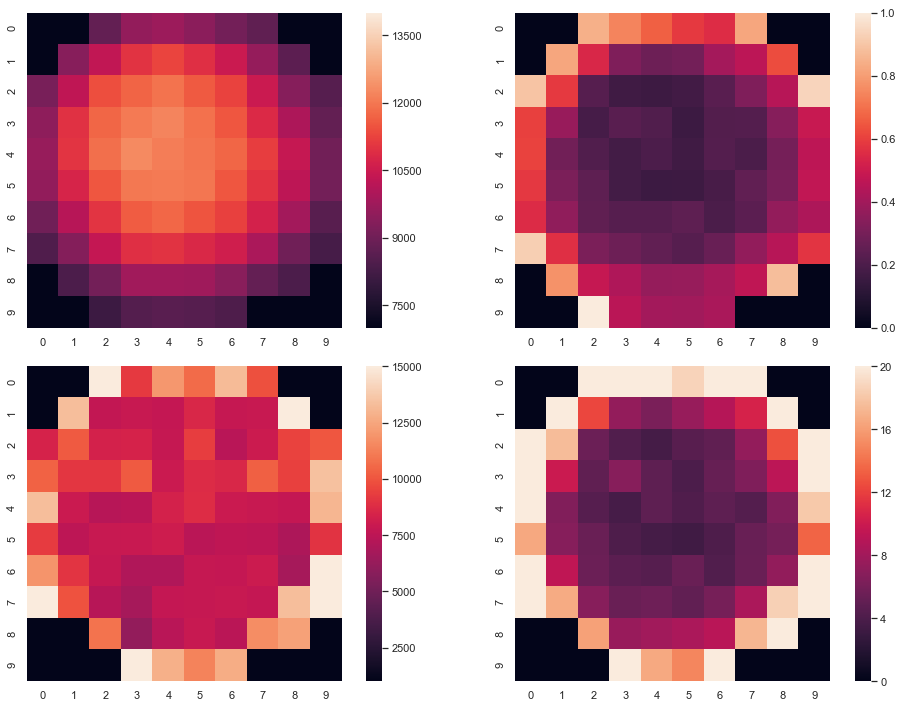

In [111]:
draw_xy_maps(asm,
            e0lims  = e0_limits,
            ltlims  = lifetime_limits,
            eulims  = (0.0,  1),
            lulims  = (0, 20),
            figsize=(14,10))

In [112]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

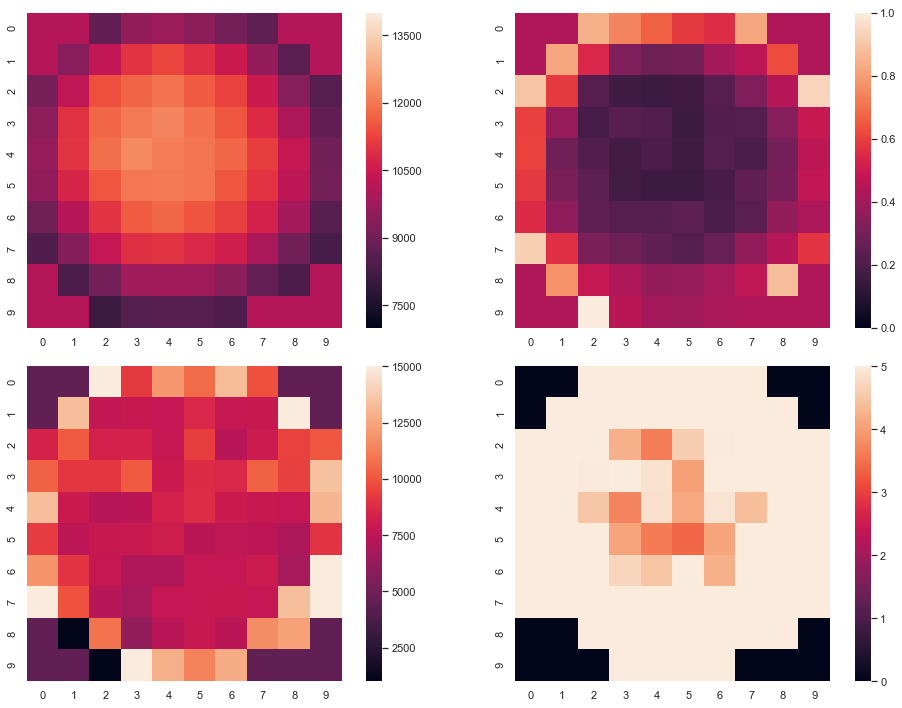

In [113]:
draw_xy_maps(asmAv,
            e0lims  = e0_limits,
            ltlims  = lifetime_limits,
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

In [114]:
asm = add_mapinfo(asmAv, krRanges.X, krRanges.Y, krNbins.X, krNbins.Y, run_number)

In [115]:
emap_file_name

'kr_emap_xy_10_10_r_7517_ScriptTest.h5'

In [116]:
print('The map info is:')
print(asm.mapinfo)
if output:
    write_maps(asm, filename=emap_file_name)

The map info is:
xmin          -200
xmax           200
ymin          -200
ymax           200
nx              10
ny              10
run_number    7517
dtype: int64
